In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attractions_new.csv to attractions_new.csv


In [ ]:
df_attractions = pd.read_csv('attractions_new.csv')
print(df_attractions.shape)
df_attractions

(100, 13)


,location_id,location_name,ratings,description,best time to visit,location_type,type_id,no. of ratings,user_id,state,Address,website_link,image_link
0,0,Leh Ladakh,4.6,Ladakh is a union territory in the Kashmir reg...,Jun to Sep,Hill Station,1,139,1,Jammu and Kashmir,"leh ladhak,jammu and kashmir,194101,india",lehladakhindia.com,https://www.holidify.com/images/bgImages/LADAK...
1,1,Srinagar,4.5,"Famously known as 'Heaven on Earth, Srinagar i...",April to October,City,2,126,3,Jammu and Kashmir,"srinagar,jammu and kashmir,190001,india",srinagar.nic.in,https://www.holidify.com/images/bgImages/SRIN...
2,2,Manali,4.5,"With spectacular valleys, breathtaking views, ...",October to June,Hill Station,1,466,3,Himachal Pradesh,"manali,himachal pradesh,175131,india",himachaltourism.gov.in,https://www.holidify.com/images/bgImages/MANA...
3,3,Coorg,4.2,Located amidst imposing mountains in Karnataka...,October to March,Hill Station,1,432,5,Karnataka,"coorg,karnataka,571201,india",coorgtourism.co.in,https://www.holidify.com/images/bgImages/COOR...
4,4,Andaman,4.5,Replete with turquoise blue water beaches and ...,October to Jun,Island,3,135,2,Andaman and Nicobar Islands,"andaman,andamana and nicobar,744209",andamans.gov.in,https://www.holidify.com/images/bgImages/ANDA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Lavasa,3.9,"Known as India's newest hill station, the Lava...",Throughout the year,Hill Station,1,75,3,Maharashtra,"lavasa,maharashtra,412112,india",lavasa.com,https://www.holidify.com/images/bgImages/LAVA...
96,96,Poovar,4.3,Poovar is a small rustic town situated 27 kms ...,August to March,Beach,4,54,2,Kerala,"poovar,kerala,695525,india",poovar.kerala.gov.in,https://www.holidify.com/images/bgImages/POOV...
97,97,Digha,4.0,Beach town situated on the shores of Bay of Be...,July to March,Beach,4,160,5,West Bengal,"digha,west bengal,721428,india",puri.nic.in/digha,https://www.holidify.com/images/bgImages/DIGH...
98,98,Bikaner,4.3,"Located in the midst of Thar Desert, Bikaner i...",October to March,City,2,48,1,Rajasthan,"bikaner,rajasthan,334001,india",bikaner.nic.in,https://www.holidify.com/images/bgImages/BIKA...


In [ ]:
df_attractions['location_name']

0      Leh Ladakh
1        Srinagar
2          Manali
3           Coorg
4         Andaman
         ...     
95         Lavasa
96         Poovar
97          Digha
98        Bikaner
99       Agartala
Name: location_name, Length: 100, dtype: object

In [ ]:
print("Shape of frames: \n"+ " Attractions DataFrame"+ str(df_attractions.shape))

Shape of frames: 
 Attractions DataFrame(100, 13)


In [ ]:
ratings_grouped_by_users = df_attractions.groupby('user_id').agg([np.size, np.mean])
ratings_grouped_by_users.head(5)

<ipython-input-6-864a22a84fd6>:1: FutureWarning: ['location_name', 'description', 'best time to visit', 'location_type', 'state', 'Address', 'website_link', 'image_link'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ratings_grouped_by_users = df_attractions.groupby('user_id').agg([np.size, np.mean])


location_id            ratings           type_id            \
               size       mean    size      mean    size      mean   
user_id                                                              
1                21  45.476190      21  4.257143      21  2.857143   
2                23  60.000000      23  4.195652      23  2.695652   
3                19  49.684211      19  4.236842      19  3.315789   
4                19  47.263158      19  4.147368      19  2.684211   
5                18  42.944444      18  4.266667      18  2.444444   

        no. of ratings              
                  size        mean  
user_id                             
1                   21  204.714286  
2                   23  123.043478  
3                   19  144.526316  
4                   19  167.789474  
5                   18  177.388889

<Axes: xlabel='user_id'>

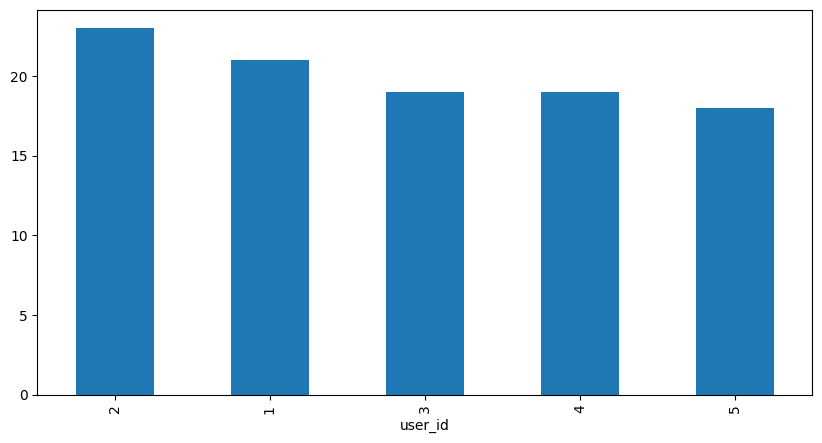

In [ ]:
ratings_grouped_by_users['ratings']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5))

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import process
def get_matches(query,choices):
  results = process.extract(query,choices)
  return results

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
get_matches("UtTarP",df_attractions['state'])

[('Uttar Pradesh', 78, 14),
 ('Uttar Pradesh', 78, 29),
 ('Uttar Pradesh', 78, 67),
 ('Uttar Pradesh', 78, 70),
 ('Uttar Pradesh', 78, 72)]

In [ ]:
tfidf_attraction_type = TfidfVectorizer()
tfidf_attraction_type_matrix = tfidf_attraction_type.fit_transform(df_attractions['location_type'])
cosine_sim_attractions = linear_kernel(tfidf_attraction_type_matrix, tfidf_attraction_type_matrix)

In [ ]:
def get_recommendations_based_on_type(location_name, cosine_sim_attractions=cosine_sim_attractions):
    """
    Calculates top 2 attraction to recommend based on given location type.
    """
    # Get the index of the attraction that matches the type
    #idx_attraction = process.extractOne(location_name, df_attractions.loc[df_attractions['location_name'].isin([location_name])])
    idx_attraction = df_attractions.loc[df_attractions['location_name'].isin([location_name])]
    idx_attraction = idx_attraction.index
    print(idx_attraction)

    # Get the pairwsie similarity scores of all attractions with that type
    sim_scores_attractions = list(enumerate(cosine_sim_attractions[idx_attraction][0]))

    # Sort the attractions based on the similarity scores
    sim_scores_attractions = sorted(sim_scores_attractions, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar attractions
    sim_scores_attractions = sim_scores_attractions[1:3]

    # Get the movie indices
    attraction_indices = [i[0] for i in sim_scores_attractions]

    # Return the top 2 most similar movies
    return df_attractions['location_name'].iloc[attraction_indices]

In [ ]:
type_entered = input("Enter the location type: ")
#type_entered = process.extract(df_attractions['location_type'],type_entered)
loc = df_attractions.loc[df_attractions['location_type'].isin([type_entered])]
location_fetch = loc.iloc[0]['location_name']
get_recommendations_based_on_type(location_fetch)

Enter the location type: Waterfall
Int64Index([68], dtype='int64')


90     Hogenakkal
0      Leh Ladakh
Name: location_name, dtype: object

In [ ]:
 tfidf_attraction_state= TfidfVectorizer()
tfidf_attraction_state_matrix = tfidf_attraction_state.fit_transform(df_attractions['state'])
cosine_sim_attractions_pro = linear_kernel(tfidf_attraction_state_matrix, tfidf_attraction_state_matrix)

In [ ]:
def get_recommendations_based_on_state(location_name, cosine_sim_attractions_pro=cosine_sim_attractions_pro):
    """
    Calculates top 2 attraction to recommend based on given location type.
    """

    idx_attraction_pro = df_attractions.loc[df_attractions['location_name'].isin([location_name])]
    idx_attraction_pro = idx_attraction_pro.index

    sim_scores_attractions_pro = list(enumerate(cosine_sim_attractions_pro[idx_attraction_pro][0]))

    # Sort the attractions based on the similarity scores
    sim_scores_attractions_pro = sorted(sim_scores_attractions_pro, key=lambda x: x[1], reverse=True)

    # Get the scores of the 2 most similar attractions
    sim_scores_attractions_pro = sim_scores_attractions_pro[1:3]

    # Get the attraction indices
    attraction_indices_pro = [i[0] for i in sim_scores_attractions_pro]

    # Return the top 2 most similar attraction
    return df_attractions['location_name'].iloc[attraction_indices_pro]


In [ ]:
type_entered = input("Enter the location state: ")
loc = df_attractions.loc[df_attractions['state'].isin([type_entered])]
state_fetch = loc.iloc[0]['location_name']
get_recommendations_based_on_state(state_fetch)

Enter the location state: Andhra Pradesh


64     Tirupati
2        Manali
Name: location_name, dtype: object

In [ ]:
tfidf_attraction_best_time = TfidfVectorizer()
tfidf_attraction_best_time_matrix = tfidf_attraction_best_time.fit_transform(df_attractions['best time to visit'])
cosine_sim_attractions_best_time = linear_kernel(tfidf_attraction_best_time_matrix, tfidf_attraction_best_time_matrix)

In [ ]:
def get_recommendations_based_on_best_time(location_name, cosine_sim_attractions_best_time=cosine_sim_attractions_best_time):
    """
    Calculates top 2 attraction to recommend based on given best time to visit.
    """

    idx_attraction_best_time = df_attractions.loc[df_attractions['location_name'].isin([location_name])]
    idx_attraction_best_time = idx_attraction_best_time.index

    # Get the pairwsie similarity scores of all attraction with that name
    sim_scores_attractions_best_time = list(enumerate(cosine_sim_attractions_best_time[idx_attraction_best_time][0]))

    # Sort the attractions based on the similarity scores
    sim_scores_attractions_best_time = sorted(sim_scores_attractions_best_time, key=lambda x: x[1], reverse=True)

    # Get the scores of the 2 most similar attractions
    sim_scores_attractions_best_time = sim_scores_attractions_best_time[1:3]

    # Get the attraction indices
    attraction_indices_best_time = [i[0] for i in sim_scores_attractions_best_time]

    # Return the top 2 most similar attractions
    return df_attractions['location_name'].iloc[attraction_indices_best_time]

In [ ]:
type_entered = input("Enter the time of the year you want to visit a location: ")
loc = df_attractions.loc[df_attractions['best time to visit'].isin([type_entered])]
time_fetch = loc.iloc[0]['location_name']
get_recommendations_based_on_best_time(time_fetch)

Enter the time of the year you want to visit a location: September to March


60     Visakhapatnam
64          Tirupati
Name: location_name, dtype: object

In [ ]:
features = ['location_type', 'state', 'best time to visit','ratings']
df_attractions['location_type'].isnull().values.any()
df_attractions['state'].isnull().values.any()
df_attractions['no. of ratings'].isnull().values.any()

def combine_features(row):
    return row['location_type']+' '+row['state']+'  '+row['best time to visit']+' '+str(row['ratings'])

In [ ]:
for feature in features:
    df_attractions[feature] = df_attractions[feature].fillna('')
    df_attractions['combined_features'] = df_attractions.apply(combine_features, axis = 1)
print(df_attractions.loc[0, 'combined_features'])

Hill Station Jammu and Kashmir  Jun to Sep 4.6


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
count_matrix = cv.fit_transform(df_attractions['combined_features'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix)



def get_location_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["location_name"].values[0]

def get_locationId_from_location(location_name):
    return df_attractions[df_attractions.location_name == location_name]["location_id"].values[0]

def get_ratings_from_locationId(location_id):
  return df_attractions[df_attractions.location_id == location_id]["ratings"].values[0]

def get_provience_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["state"].values[0]

def get_best_time_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["best_time_to_visit"].values[0]

def get_address_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["Address"].values[0]

def get_website_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["Website_link"].values[0]

def get_image_from_locationId(location_id):
    return df_attractions[df_attractions.location_id == location_id]["image_link"].values[0]

